In [1]:
import pandas as pd
from my_awesome_eda import run_eda
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import (r2_score,
                             mean_squared_error,roc_auc_score)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.compose  import ColumnTransformer

In [2]:
plt.rcParams["figure.figsize"] = 9, 7
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

In [3]:
data=pd.read_csv('./Transformed Data Set - Sheet1.csv')
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
data.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [5]:
#Проверим тип данных во всех столбцах
data.info()
#Все колонки имеют тип данных object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [6]:
freq = []
data_for_table = []
print(f'\033[1;36mNumber of values and their frequencies:\033[1;0m\n')

for column in data.columns:
    value_list = data[column].value_counts().index
    value_count_list = data[column].value_counts().values
    freq_list = list(map(lambda x: x / value_count_list.sum(), value_count_list))

    for value, value_count, freq in zip(value_list, value_count_list, freq_list):
        data_for_table.append([value, value_count, round(freq, 3)])
    print(f"\033[1;36m{column}\033[0;0m")
    print(tabulate(data_for_table, headers=['Name', 'Count', 'Frequences'], tablefmt='rounded_outline') + '\n')
    data_for_table.clear()

Number of values and their frequencies:

Favorite Color
╭─────────┬─────────┬──────────────╮
│ Name    │   Count │   Frequences │
├─────────┼─────────┼──────────────┤
│ Cool    │      37 │        0.561 │
│ Warm    │      22 │        0.333 │
│ Neutral │       7 │        0.106 │
╰─────────┴─────────┴──────────────╯

Favorite Music Genre
╭──────────────────┬─────────┬──────────────╮
│ Name             │   Count │   Frequences │
├──────────────────┼─────────┼──────────────┤
│ Rock             │      19 │        0.288 │
│ Pop              │      17 │        0.258 │
│ Hip hop          │       8 │        0.121 │
│ Electronic       │       8 │        0.121 │
│ R&B and soul     │       6 │        0.091 │
│ Folk/Traditional │       4 │        0.061 │
│ Jazz/Blues       │       4 │        0.061 │
╰──────────────────┴─────────┴──────────────╯

Favorite Beverage
╭───────────────┬─────────┬──────────────╮
│ Name          │   Count │   Frequences │
├───────────────┼─────────┼──────────────┤
│ Doesn't

In [7]:
y = data['Gender']
x = data[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink']]

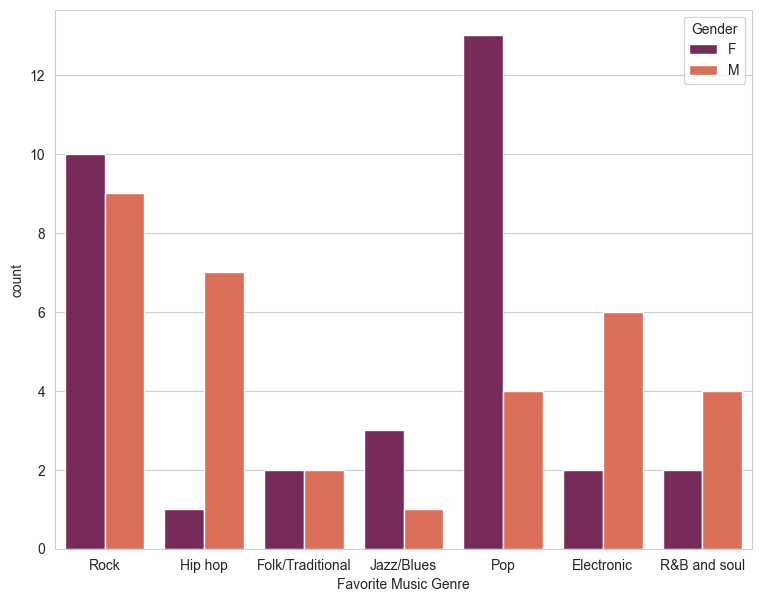

In [8]:
sns.countplot(data, x="Favorite Music Genre", hue = 'Gender', palette="rocket")
print('')

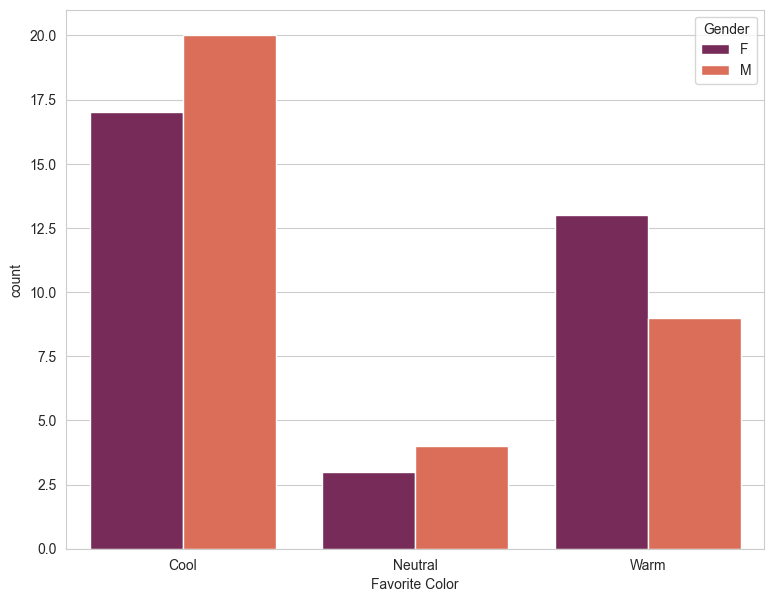

In [9]:
sns.countplot(data, x="Favorite Color", hue = 'Gender', palette="rocket")
print('')

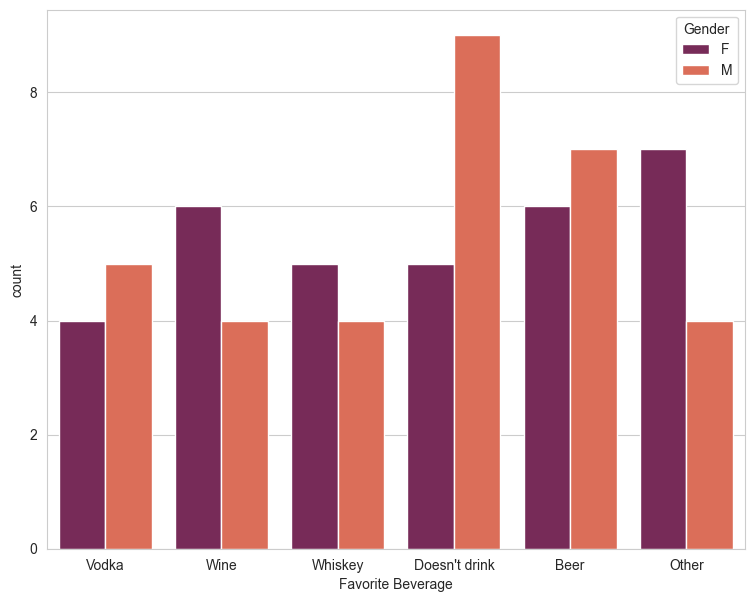

In [10]:
sns.countplot(data, x="Favorite Beverage", hue = 'Gender', palette="rocket")
print('')

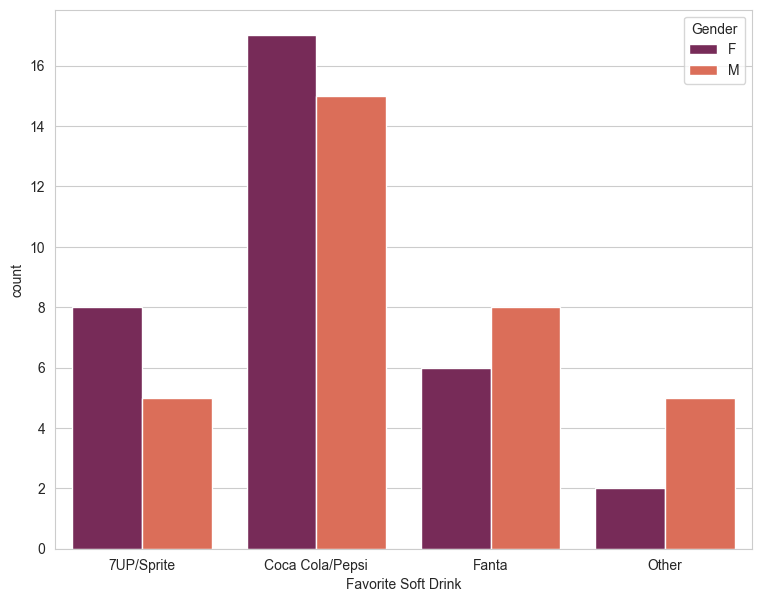

In [11]:
sns.countplot(data, x="Favorite Soft Drink", hue = 'Gender', palette="rocket")
print('')

In [12]:
print(f"Общее количество наблюдений: {len(data)}")

Общее количество наблюдений: 66


Number of NA:

 Total: 0
 Number of rows with NA: 0
 Columns containing NA: []


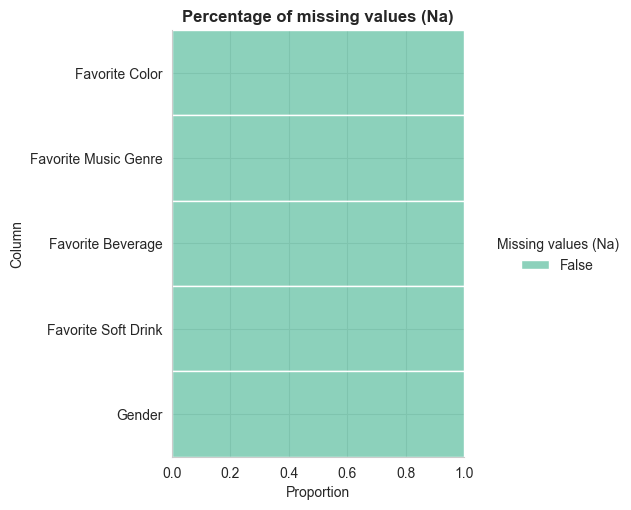

In [13]:
#Проверим данные на наличие пропусков
na_in_columns = data.isna().any()
print(f"\033[1;34mNumber of NA:\033[0m\n")
print(f"\033[1m Total:\033[0m {data.isna().sum().sum()}")
print(f"\033[1m Number of rows with NA:\033[0m {data.isna().any(axis=1).sum()}")
print(f"\033[1m Columns containing NA:\033[0m {list(na_in_columns[na_in_columns].index)}\n")

sns.displot( data=data.isna().melt(value_name="Missing values (Na)",var_name = 'Column'), y="Column", hue="Missing values (Na)", multiple="fill", palette='Set2')
plt.title("Percentage of missing values (Na)", weight="bold")
plt.xlabel("Proportion")
plt.ylabel("Column")
print('')

In [14]:
dict_0 = {'Cool': 0, 'Warm': 1, 'Neutral': 2}
dict_1 = {'Rock':0,'Pop':1, 'Hip hop':2, 'Electronic':3,'R&B and soul':4, 'Folk/Traditional':5, 'Jazz/Blues':6}
dict_2 = {'Doesn\'t drink': 0, 'Beer': 1, "Other": 2, 'Wine': 3, 'Vodka': 4, 'Whiskey':5}
dict_3 = {'Coca Cola/Pepsi': 0, 'Fanta':1, '7UP/Sprite': 2, 'Other': 3}
dict_4 = {'F':0, 'M':1}

# Remap the values of the dataframe
data2 = data.replace({"Favorite Color": dict_0, "Favorite Music Genre": dict_1, 'Favorite Beverage': dict_2, "Favorite Soft Drink": dict_3,'Gender': dict_4})

/var/folders/7w/bn4plfg54bxf7fbpr3dxlsxc0000gn/T/ipykernel_12040/317401790.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2 = data.replace({"Favorite Color": dict_0, "Favorite Music Genre": dict_1, 'Favorite Beverage': dict_2, "Favorite Soft Drink": dict_3,'Gender': dict_4})


In [15]:
freq = []
data_for_table = []
print(f'\033[1;36mNumber of values and their frequencies:\033[1;0m\n')

for column in data2.columns:
    value_list = data2[column].value_counts().index
    value_count_list = data2[column].value_counts().values
    freq_list = list(map(lambda x: x / value_count_list.sum(), value_count_list))

    for value, value_count, freq in zip(value_list, value_count_list, freq_list):
        data_for_table.append([value, value_count, round(freq, 3)])
    print(f"\033[1;36m{column}\033[0;0m")
    print(tabulate(data_for_table, headers=['Name', 'Count', 'Frequences'], tablefmt='rounded_outline') + '\n')
    data_for_table.clear()

Number of values and their frequencies:

Favorite Color
╭────────┬─────────┬──────────────╮
│   Name │   Count │   Frequences │
├────────┼─────────┼──────────────┤
│      0 │      37 │        0.561 │
│      1 │      22 │        0.333 │
│      2 │       7 │        0.106 │
╰────────┴─────────┴──────────────╯

Favorite Music Genre
╭────────┬─────────┬──────────────╮
│   Name │   Count │   Frequences │
├────────┼─────────┼──────────────┤
│      0 │      19 │        0.288 │
│      1 │      17 │        0.258 │
│      2 │       8 │        0.121 │
│      3 │       8 │        0.121 │
│      4 │       6 │        0.091 │
│      5 │       4 │        0.061 │
│      6 │       4 │        0.061 │
╰────────┴─────────┴──────────────╯

Favorite Beverage
╭────────┬─────────┬──────────────╮
│   Name │   Count │   Frequences │
├────────┼─────────┼──────────────┤
│      0 │      14 │        0.212 │
│      1 │      13 │        0.197 │
│      2 │      11 │        0.167 │
│      3 │      10 │        0.152 │
│  

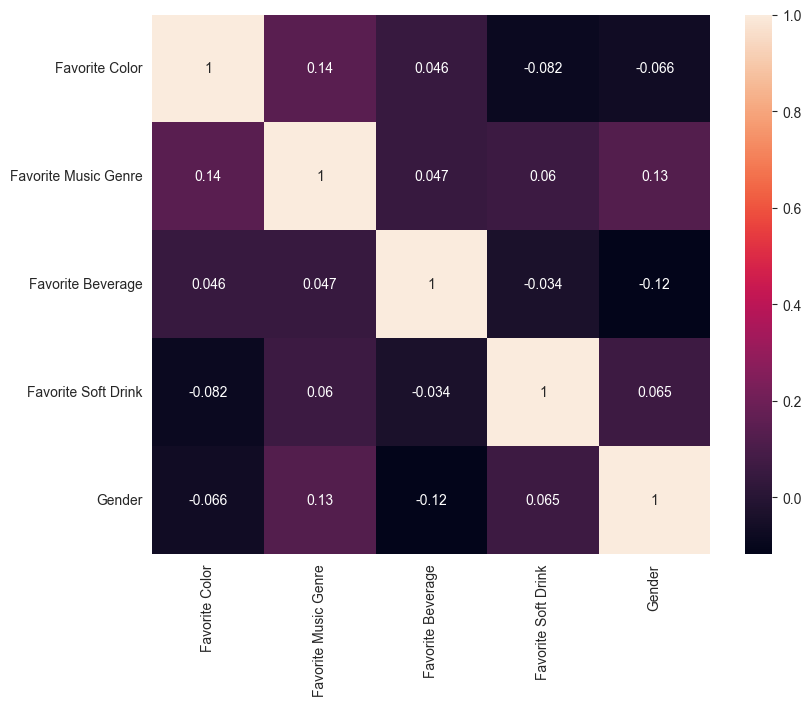

In [16]:
#from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка
#stat, p = shapiro(data2.drop('Gender', axis = 1))
#print(f'Statistics={stat:.3f}, p={p:.3f}')
sns.heatmap(data2.corr(method="spearman"), annot=True);

In [17]:
data2

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,0,4,2,0
1,2,2,4,0,0
2,1,0,3,0,0
3,1,5,5,1,0
4,0,0,4,0,0
...,...,...,...,...,...
61,0,0,4,0,1
62,0,2,1,0,1
63,2,2,0,1,1
64,0,0,3,0,1


In [152]:
#Разделим данные на тестовую и тренировочную выборки
x = data2.drop('Gender', axis = 1)
y = data2['Gender']

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=SEED)

In [165]:
#Сделаем пайплайн (стандартизация данных и создание модели)
model_pipe = Pipeline(steps=[
    ('model', LogisticRegression())
])

#Обучим модель 
model_pipe.fit(X_train, y_train)

#Предскажем значения
predictions = model_pipe.predict(X_test)


Accuracy =  0.17647058823529413
Precision = 0.16666666666666666
Recall = 0.1
F1_score = 0.125


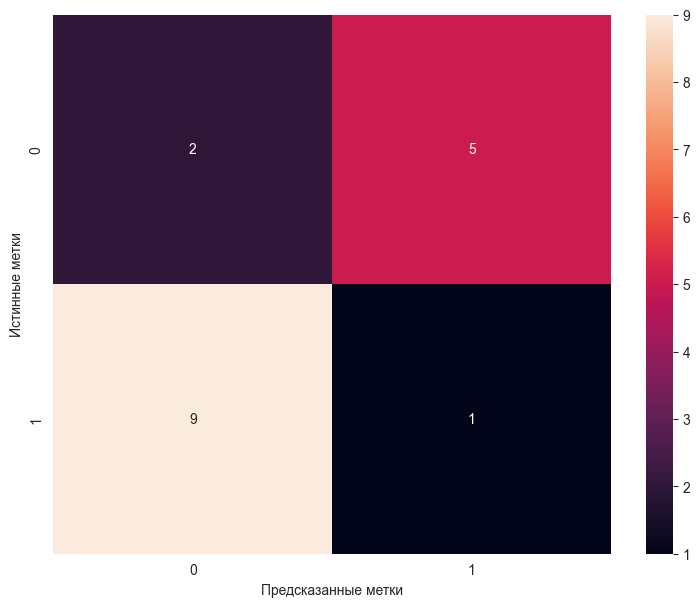

In [166]:
print(f"Accuracy =  {accuracy_score(y_test, predictions)}")
print(f"Precision = {precision_score(y_test,predictions)}")
print(f"Recall = {recall_score(y_test,predictions)}")
print(f"F1_score = {f1_score(y_test,predictions)}")

sns.heatmap(confusion_matrix(y_test, predictions),
            annot=True).set(xlabel="Предсказанные метки", ylabel="Истинные метки");